# Peyton Manninng v/s Tom Brady 

In [17]:
import pandas as pd
import seaborn as sns
import re

In [18]:
def brady_manning(year1, year2):


    for i in range(year1,year2):
        yr_col = []
    # For Tom Brady vs Peyton Manning
    # As we are comparing 2 players i.e. length of QB list 
    # we have
        QBs = ['PeytonManning','TomBrady']
        
        yrs = str(i)
        file_name = yrs + '_NFL_Passing.csv'
        dataframe = pd.read_csv(file_name)
        dataframe.fillna(0, inplace=True)
            
        PlayerNames = []
    
        for pl in dataframe['Player']:
            pl = re.sub('[^A-Za-z0-9]+','',pl)
            PlayerNames.append(pl)
    
        dataframe['Player_Name'] = PlayerNames
        dataframe = dataframe.drop(dataframe.columns[0], axis=1)
        
        final_dataframe = dataframe[dataframe['Player_Name'].isin(QBs)]
    
        final_dataframe.reset_index(drop=True, inplace=True)
        rows_num = final_dataframe.shape[0]
    
        for j in range(rows_num):
            yr_col.append(i)
        
        final_dataframe['Yr'] = yr_col
        final_df = final_dataframe
        
        if i == year1:
            rivalry = final_df
        else:
            rivalry = rivalry.append(final_df)

     
    return rivalry
    

In [19]:
tb_pm = brady_manning(2001, 2011)

D:\ANA\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
tb_pm

,Tm,Pos,Cmp,Att,Yds,TD,Int,Lng,Sk,Yds.1,4QC,GWD,Player_Name,Yr
0,IND,QB,343,547,4131,26,23,86,29,232,0,0,PeytonManning,2001
1,NWE,QB,264,413,2843,18,12,91,41,216,3,3,TomBrady,2001
0,NWE,QB,373,601,3764,28,14,49,31,190,2,3,TomBrady,2002
1,IND,QB,392,591,4200,27,19,69,23,145,4,5,PeytonManning,2002
0,IND,QB,379,566,4267,29,10,79,18,107,3,4,PeytonManning,2003
1,NWE,QB,317,527,3620,23,12,82,32,219,3,5,TomBrady,2003
0,IND,QB,336,497,4557,49,10,80,13,101,2,4,PeytonManning,2004
1,NWE,QB,288,474,3692,28,14,50,26,162,0,1,TomBrady,2004
0,NWE,QB,334,530,4110,26,14,71,26,188,3,4,TomBrady,2005
1,IND,QB,305,453,3747,28,10,80,17,81,1,1,PeytonManning,2005


In [21]:
legacy = tb_pm.groupby('Player_Name')

In [22]:
Tom_Brady = legacy.get_group('TomBrady')

In [23]:
Tom_Brady

,Tm,Pos,Cmp,Att,Yds,TD,Int,Lng,Sk,Yds.1,4QC,GWD,Player_Name,Yr
1,NWE,QB,264,413,2843,18,12,91,41,216,3,3,TomBrady,2001
0,NWE,QB,373,601,3764,28,14,49,31,190,2,3,TomBrady,2002
1,NWE,QB,317,527,3620,23,12,82,32,219,3,5,TomBrady,2003
1,NWE,QB,288,474,3692,28,14,50,26,162,0,1,TomBrady,2004
0,NWE,QB,334,530,4110,26,14,71,26,188,3,4,TomBrady,2005
1,NWE,QB,319,516,3529,24,12,62,26,175,2,2,TomBrady,2006
0,NWE,QB,398,578,4806,50,8,69,21,128,4,4,TomBrady,2007
1,NWE,0,7,11,76,0,0,26,0,0,0,0,TomBrady,2008
1,NWE,QB,371,565,4398,28,13,81,16,86,1,1,TomBrady,2009
1,NWE,QB,324,492,3900,36,4,79,25,175,2,3,TomBrady,2010


In [24]:
Peyton_Manning = legacy.get_group('PeytonManning')

In [25]:
Peyton_Manning

,Tm,Pos,Cmp,Att,Yds,TD,Int,Lng,Sk,Yds.1,4QC,GWD,Player_Name,Yr
0,IND,QB,343,547,4131,26,23,86,29,232,0,0,PeytonManning,2001
1,IND,QB,392,591,4200,27,19,69,23,145,4,5,PeytonManning,2002
0,IND,QB,379,566,4267,29,10,79,18,107,3,4,PeytonManning,2003
0,IND,QB,336,497,4557,49,10,80,13,101,2,4,PeytonManning,2004
1,IND,QB,305,453,3747,28,10,80,17,81,1,1,PeytonManning,2005
0,IND,QB,362,557,4397,31,9,68,14,86,3,3,PeytonManning,2006
1,IND,QB,337,515,4040,31,14,73,21,124,1,2,PeytonManning,2007
0,IND,QB,371,555,4002,27,12,75,14,86,4,6,PeytonManning,2008
0,IND,QB,393,571,4500,33,16,80,10,74,7,7,PeytonManning,2009
0,IND,QB,450,679,4700,33,17,73,16,91,0,2,PeytonManning,2010


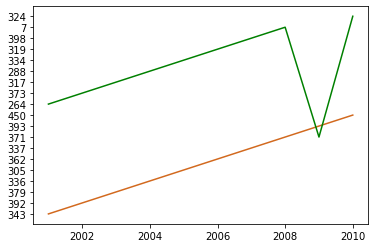

In [29]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

y = Peyton_Manning['Yr']
x1 = Peyton_Manning['Cmp']
x2 = Tom_Brady['Cmp']

plt.plot(y,x1,color="chocolate")
plt.plot(y,x2,color="green")
plt.show()